In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

Let's import the train dataset:

In [2]:
train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

Checking the first 5 rows, to have an idea of the data; </br>
Checking some measures as well and some data types.

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# test.head(5)

In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Save the ID in a separate column, and make it the index:

In [7]:
train_id = train['Id']
train.set_index(train['Id'], inplace=True)
train = train.drop(['Id'], axis=1)

# test_id = test['Id']
# test.set_index(test['Id'], inplace=True)
# test = test.drop(['Id'], axis=1)

In [8]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### First of all, I always like to deal with NaNs

Let's have a look at the total number and percentage of NaN's in each column, displaying only the columns with at least 1 Nan.

In [9]:
total = train.isna().sum().sort_values(ascending=False)
percentage = total/train.shape[0]
total_nans = pd.concat([total, percentage], axis=1, keys=['Total', "Percentage"])

# total1 = test.isna().sum().sort_values(ascending=False)
# percentage = total1/test.shape[0]
# total1_nans = pd.concat([total1, percentage], axis=1, keys=['Total', "Percentage"])

In [10]:
total_nans.loc[total_nans['Total'] > 0]

# total1_nans.loc[total1_nans['Total'] > 0]

,Total,Percentage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


Although we might be losing some data, I'll drop all columns having more than 15% of NaNs:

In [11]:
to_drop = [feature for feature in total_nans.loc[total_nans['Percentage'] >= 0.15].index]
train = train.drop(to_drop, axis=1)

# to_drop1 = [feature for feature in total1_nans.loc[total1_nans['Percentage'] >= 0.15].index]
# test = test.drop(to_drop, axis=1)

Now let's see the features that still have NaNs.

In [12]:
new = pd.DataFrame(train.isna().sum().sort_values(ascending=False), columns=['NaNs'])
new = new.loc[new['NaNs'] > 0]

# new1 = pd.DataFrame(test.isna().sum().sort_values(ascending=False), columns=['NaNs'])
# new1 = new1.loc[new1['NaNs'] > 0]

In [13]:
new.head()

,NaNs
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81
GarageCond,81


In [14]:
# new1.head()

After further consideration, I believe that the above features are not the main features we usually think about when buying a house, so I will drop all of them but Electrical: I will impute this missing value with either the mean or the mode.

In [15]:
electrical_mode = train['Electrical'].mode()
train.fillna(electrical_mode[0], inplace=True)

# electrical_mode1 = test['Electrical'].mode()
# test.fillna(electrical_mode1[0], inplace=True)

In [16]:
train['Electrical'].isna().sum()

0

In [17]:
# test['Electrical'].isna().sum()

In [18]:
to_drop = list(new.index).pop()

train = train.drop(to_drop, axis=1)
# test = test.drop(to_drop, axis=1)

Checking if there are still NaNs somewhere

In [19]:
train.isna().sum().any()

False

In [20]:
# test.isna().sum().any()

### Data Preprocessing

In [21]:
numerical = train.select_dtypes(include='number')
categorical = train.select_dtypes(include='object')

# numerical1 = test.select_dtypes(include='number')
# categorical1 = test.select_dtypes(include='object')

Since there are many categorical columns (39), I will encode them with the Label encoder.

In [22]:
categorical_cols = categorical.columns.tolist()

# categorical_cols1 = categorical1.columns.tolist()

In [23]:
for col in categorical_cols:
    print(f"{col}: {categorical[col].unique()}")

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 

I don't believe MasVnrArea and GarageYrBlt are pivotal for the model, so I will remove them.

In [24]:
to_drop = ['MasVnrArea', 'GarageYrBlt']

# Train
categorical = categorical.drop(columns=to_drop)
train = train.drop(columns=to_drop)
categorical_cols = [x for x in categorical_cols if x not in to_drop]

#Test
# categorical1 = categorical1.drop(columns=to_drop)
# test = test.drop(columns=to_drop)
# categorical_cols1 = [x for x in categorical_cols1 if x not in to_drop]

In [25]:
for col in categorical_cols:
    print(f"{col}: {categorical[col].unique()}")

MSZoning: ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street: ['Pave' 'Grvl']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle: ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl: ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
Exterior1st: ['VinylSd' 'MetalSd' 'Wd Sdng' 

### I'll label-encode the categorical data

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
train[categorical_cols].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,CentralAir,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Y,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Y,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Y,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Y,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Y,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [28]:
encoder = LabelEncoder()
# encoder1 = LabelEncoder()

#Train
train[categorical_cols] = train[categorical_cols].apply(lambda col: encoder.fit_transform(col))

#Test
# test[categorical_cols1] = test[categorical_cols1].apply(lambda col: encoder1.fit_transform(col))

In [29]:
# How to find columns where a specific value is present
value_to_find = 'SBrkr'

columns_with_value = train.columns[train.eq(value_to_find).any()].tolist()
columns_with_value

[]

## Let's work as well on numerical data

### Outliers

In [30]:
def outliers_list_and_boxplot(df, columns):
    for col in columns:
        out_lower = []
        out_upper = []
        column_data = df[col]

        q1 = column_data.quantile(0.25)
        q3 = column_data.quantile(0.75)
        iqr = q3 - q1
        lower_end = q1 - 1.5 * iqr
        upper_end = q3 + 1.5 * iqr

        for value in column_data:
            if value < lower_end:
                out_lower.append(value)
            elif value > upper_end:
                out_upper.append(value)

        out_lower = sorted(out_lower)
        out_upper = sorted(out_upper)
        
        plt.figure(figsize=(3, 2))
        sns.boxplot(column_data)
        plt.show()

        print(f'Low Outliers in {col}: {out_lower}')
        print(f'Upper Outliers in {col}: {out_upper}')
        print()
        print()

I would like to make some columns binary, as they have too many 0's and I think it's more valuable to know if the feature is at all there or not.

In [31]:
cols_to_binary = ['TotalBsmtSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Fireplaces', 'EnclosedPorch', '3SsnPorch',
                  'ScreenPorch', 'PoolArea', ]

# Transforming the columns and at the same time adding them to the train dataset

for col in cols_to_binary:
    
    #Train
    train[f'Is_{col}'] = numerical[col].apply(lambda x: 1 if x!=0 else 0)
    
    #Test
#     test[f'Is_{col}'] = numerical1[col].apply(lambda x: 1 if x!=0 else 0)
    
numerical = numerical.drop(cols_to_binary, axis=1)
# numerical1 = numerical1.drop(cols_to_binary, axis=1)

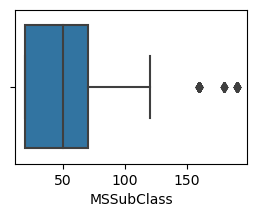

Low Outliers in MSSubClass: []
Upper Outliers in MSSubClass: [160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190, 190]




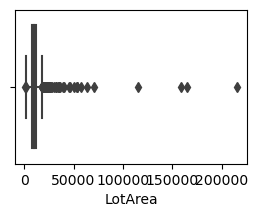

Low Outliers in LotArea: [1300, 1477]
Upper Outliers in LotArea: [17755, 17871, 17920, 18000, 18030, 18386, 18450, 18800, 18890, 19138, 19296, 19378, 19690, 19900, 20431, 20544, 20781, 20896, 21000, 21286, 21384, 21453, 21535, 21695, 21750, 21750, 21780, 21872, 21930, 22420, 22950, 23257, 23595, 24090, 24682, 25000, 25095, 25286, 25339, 25419, 26142, 26178, 27650, 28698, 29959, 31770, 32463, 32668, 34650, 35133, 35760, 36500, 39104, 40094, 45600, 46589, 50271, 53107, 53227, 53504, 57200, 63887, 70761, 115149, 159000, 164660, 215245]




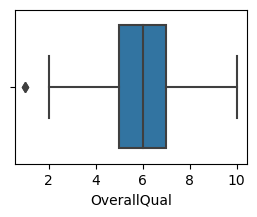

Low Outliers in OverallQual: [1, 1]
Upper Outliers in OverallQual: []




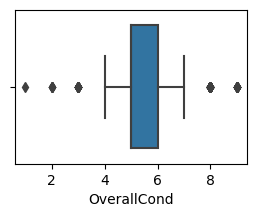

Low Outliers in OverallCond: [1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
Upper Outliers in OverallCond: [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]




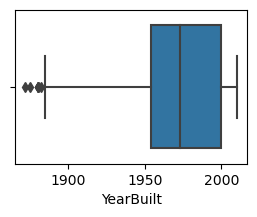

Low Outliers in YearBuilt: [1872, 1875, 1880, 1880, 1880, 1880, 1882]
Upper Outliers in YearBuilt: []




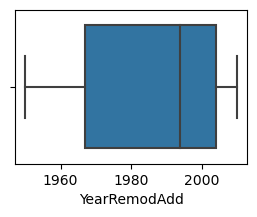

Low Outliers in YearRemodAdd: []
Upper Outliers in YearRemodAdd: []




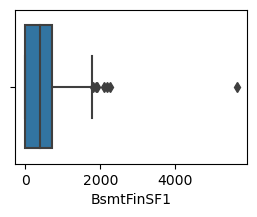

Low Outliers in BsmtFinSF1: []
Upper Outliers in BsmtFinSF1: [1810, 1880, 1904, 2096, 2188, 2260, 5644]




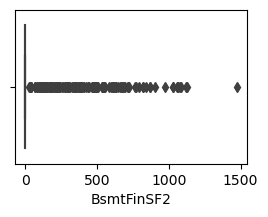

Low Outliers in BsmtFinSF2: []
Upper Outliers in BsmtFinSF2: [28, 32, 35, 40, 41, 41, 64, 64, 68, 80, 81, 93, 93, 96, 96, 105, 106, 108, 110, 117, 117, 119, 121, 123, 125, 127, 128, 132, 139, 144, 147, 147, 149, 150, 163, 165, 168, 169, 173, 174, 175, 177, 180, 180, 180, 180, 180, 181, 182, 182, 184, 193, 202, 208, 210, 211, 215, 219, 228, 230, 232, 239, 240, 258, 264, 273, 276, 279, 279, 287, 287, 290, 290, 294, 294, 306, 311, 324, 334, 336, 344, 345, 352, 354, 362, 374, 374, 374, 375, 377, 380, 391, 391, 396, 400, 411, 420, 435, 438, 441, 465, 466, 468, 468, 469, 469, 472, 479, 480, 480, 486, 491, 492, 495, 499, 500, 506, 531, 532, 539, 539, 544, 546, 547, 551, 551, 557, 580, 600, 606, 608, 612, 620, 627, 630, 634, 645, 661, 668, 670, 682, 690, 692, 712, 712, 713, 723, 764, 768, 791, 820, 823, 841, 869, 872, 906, 972, 1029, 1031, 1057, 1061, 1063, 1080, 1085, 1120, 1127, 1474]




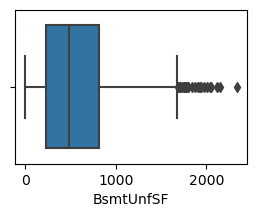

Low Outliers in BsmtUnfSF: []
Upper Outliers in BsmtUnfSF: [1686, 1689, 1694, 1694, 1709, 1710, 1734, 1752, 1753, 1753, 1768, 1774, 1777, 1795, 1800, 1800, 1836, 1869, 1905, 1907, 1926, 1935, 1969, 2002, 2042, 2046, 2121, 2153, 2336]




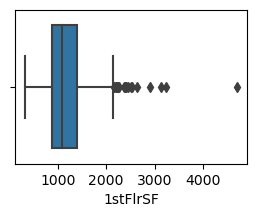

Low Outliers in 1stFlrSF: []
Upper Outliers in 1stFlrSF: [2156, 2158, 2196, 2207, 2217, 2223, 2234, 2259, 2364, 2392, 2402, 2411, 2444, 2515, 2524, 2633, 2898, 3138, 3228, 4692]




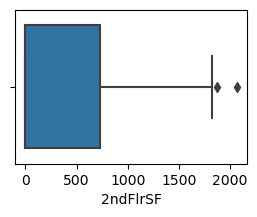

Low Outliers in 2ndFlrSF: []
Upper Outliers in 2ndFlrSF: [1872, 2065]




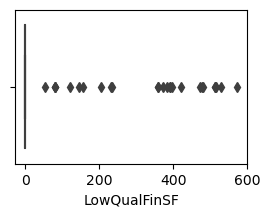

Low Outliers in LowQualFinSF: []
Upper Outliers in LowQualFinSF: [53, 80, 80, 80, 120, 144, 156, 205, 232, 234, 360, 360, 371, 384, 390, 392, 397, 420, 473, 479, 481, 513, 514, 515, 528, 572]




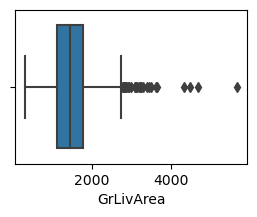

Low Outliers in GrLivArea: []
Upper Outliers in GrLivArea: [2775, 2784, 2792, 2794, 2810, 2822, 2828, 2868, 2872, 2872, 2898, 2945, 2978, 3082, 3086, 3112, 3140, 3194, 3222, 3228, 3238, 3279, 3395, 3447, 3493, 3608, 3627, 4316, 4476, 4676, 5642]




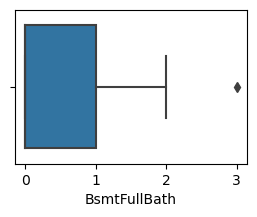

Low Outliers in BsmtFullBath: []
Upper Outliers in BsmtFullBath: [3]




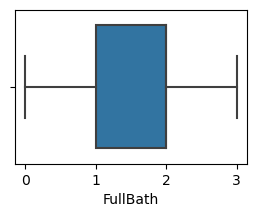

Low Outliers in FullBath: []
Upper Outliers in FullBath: []




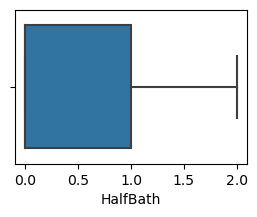

Low Outliers in HalfBath: []
Upper Outliers in HalfBath: []




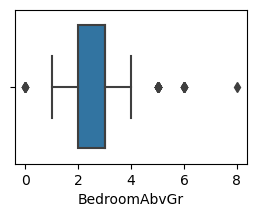

Low Outliers in BedroomAbvGr: [0, 0, 0, 0, 0, 0]
Upper Outliers in BedroomAbvGr: [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 8]




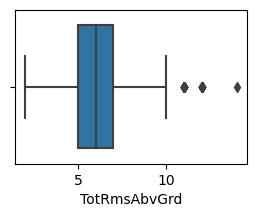

Low Outliers in TotRmsAbvGrd: []
Upper Outliers in TotRmsAbvGrd: [11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14]




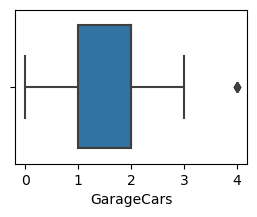

Low Outliers in GarageCars: []
Upper Outliers in GarageCars: [4, 4, 4, 4, 4]




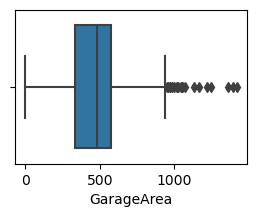

Low Outliers in GarageArea: []
Upper Outliers in GarageArea: [947, 954, 968, 968, 983, 995, 1014, 1020, 1025, 1043, 1052, 1052, 1053, 1069, 1134, 1166, 1220, 1248, 1356, 1390, 1418]




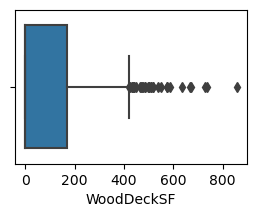

Low Outliers in WoodDeckSF: []
Upper Outliers in WoodDeckSF: [421, 426, 431, 431, 436, 439, 441, 448, 466, 468, 474, 476, 486, 486, 495, 500, 503, 509, 511, 517, 519, 536, 550, 574, 576, 586, 635, 668, 670, 728, 736, 857]




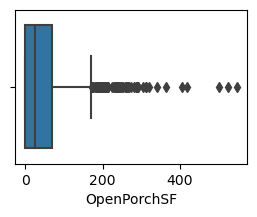

Low Outliers in OpenPorchSF: []
Upper Outliers in OpenPorchSF: [172, 172, 174, 175, 176, 180, 182, 184, 184, 184, 185, 187, 188, 189, 191, 192, 192, 192, 195, 198, 198, 199, 200, 204, 204, 205, 207, 207, 208, 210, 211, 211, 213, 214, 224, 228, 228, 229, 231, 234, 234, 234, 235, 236, 238, 240, 240, 241, 243, 244, 247, 250, 252, 258, 260, 262, 263, 265, 267, 274, 282, 285, 287, 288, 291, 292, 304, 312, 312, 319, 341, 364, 406, 418, 502, 523, 547]




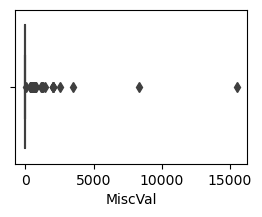

Low Outliers in MiscVal: []
Upper Outliers in MiscVal: [54, 350, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 400, 450, 450, 450, 450, 480, 480, 500, 500, 500, 500, 500, 500, 500, 500, 560, 600, 600, 600, 600, 620, 700, 700, 700, 700, 700, 800, 1150, 1200, 1200, 1300, 1400, 2000, 2000, 2000, 2000, 2500, 3500, 8300, 15500]




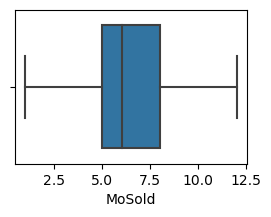

Low Outliers in MoSold: []
Upper Outliers in MoSold: []




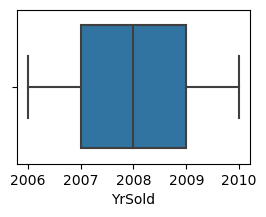

Low Outliers in YrSold: []
Upper Outliers in YrSold: []




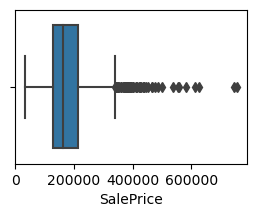

Low Outliers in SalePrice: []
Upper Outliers in SalePrice: [341000, 342643, 345000, 345000, 348000, 350000, 350000, 354000, 359100, 360000, 361919, 367294, 369900, 370878, 372402, 372500, 374000, 375000, 377426, 377500, 378500, 380000, 381000, 383970, 385000, 385000, 386250, 392000, 392500, 394432, 394617, 395000, 395192, 402000, 402861, 403000, 410000, 412500, 415298, 423000, 424870, 426000, 430000, 437154, 438780, 440000, 446261, 451950, 465000, 466500, 475000, 485000, 501837, 538000, 555000, 556581, 582933, 611657, 625000, 745000, 755000]




In [32]:
columns = numerical.columns.to_list()
outliers_list_and_boxplot(numerical, columns)

Applying yeojohnson transformation to the remaining numerical columns

In [33]:
yeoj = numerical.copy()
# yeoj1 = numerical1.copy()

for col in columns:
    
    #Train
    yeoj[col], _ = stats.yeojohnson(yeoj[col])
    
    #Test 
#     yeoj1[col], _ = stats.yeojohnson(yeoj1[col])

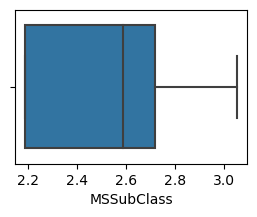

Low Outliers in MSSubClass: []
Upper Outliers in MSSubClass: []




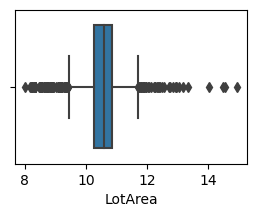

Low Outliers in LotArea: [8.025001604005446, 8.184418520284991, 8.196225875603442, 8.225280849716107, 8.231014317077056, 8.231014317077056, 8.281503455825716, 8.34589957607854, 8.34589957607854, 8.34589957607854, 8.34589957607854, 8.34589957607854, 8.34589957607854, 8.34589957607854, 8.34589957607854, 8.34589957607854, 8.34589957607854, 8.480074778712765, 8.494163078687947, 8.494163078687947, 8.514028396422122, 8.524500628936634, 8.533595287225879, 8.535535911717036, 8.549039973932045, 8.566199302161928, 8.575635597508922, 8.637456520731051, 8.637456520731051, 8.637456520731051, 8.66291341862415, 8.695912197629548, 8.724748037262836, 8.731441611341983, 8.731441611341983, 8.731441611341983, 8.736439432592025, 8.746928169242368, 8.746928169242368, 8.779509764967472, 8.8217294076402, 8.848461221088293, 8.859609025451759, 8.859609025451759, 8.859609025451759, 8.870663014406862, 8.884598548986597, 8.894462805453125, 8.912034077240913, 8.920250713231168, 8.920250713231168, 8.923138491608535,

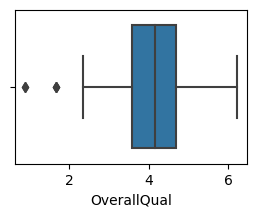

Low Outliers in OverallQual: [0.8918818118922789, 0.8918818118922789, 1.6529924794854611, 1.6529924794854611, 1.6529924794854611]
Upper Outliers in OverallQual: []




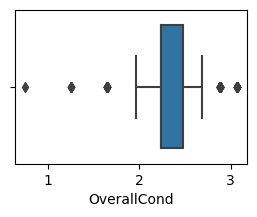

Low Outliers in OverallCond: [0.75372235962376, 1.2559507818210256, 1.2559507818210256, 1.2559507818210256, 1.2559507818210256, 1.2559507818210256, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703, 1.642912749469703]
Upper Outliers in OverallCond: [2.8880499984878325, 2.8880499984878325, 2.8880499984878325, 2.8880499984878325, 2.8880499984878325, 2.8880499984878325, 2.8880499984878325, 2.8880499984878325, 2.8880499984878325, 2.8880499984878325, 2.8880499984878325, 2.8880499984878325, 2.8880499984878325, 2.8880499984878325, 2.8880499984878325, 2.8880499984878325, 2.8880499984878325, 2.888

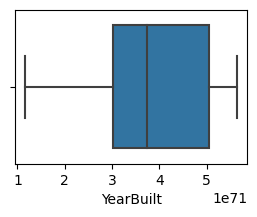

Low Outliers in YearBuilt: []
Upper Outliers in YearBuilt: []




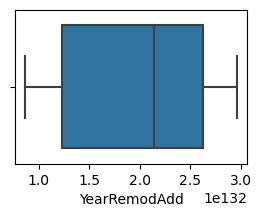

Low Outliers in YearRemodAdd: []
Upper Outliers in YearRemodAdd: []




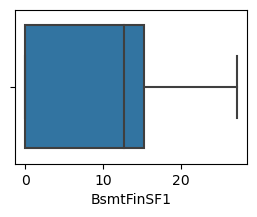

Low Outliers in BsmtFinSF1: []
Upper Outliers in BsmtFinSF1: []




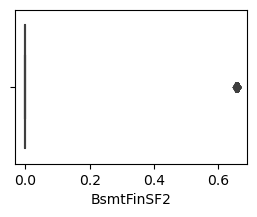

Low Outliers in BsmtFinSF2: []
Upper Outliers in BsmtFinSF2: [0.6533104812204551, 0.6540090305222362, 0.6544077329210533, 0.6549134022433252, 0.6549965983954662, 0.6549965983954662, 0.6560780671607422, 0.6560780671607422, 0.6561776290328168, 0.6564042220167446, 0.6564193905530437, 0.6565704211433719, 0.6565704211433719, 0.6566009423186587, 0.6566009423186587, 0.6566796653094971, 0.6566873912196198, 0.65670230900369, 0.656716552226623, 0.656761666792841, 0.656761666792841, 0.6567733477600917, 0.6567845479478763, 0.6567952945482887, 0.6568056128099945, 0.6568155262052064, 0.6568203379644914, 0.6568386781289651, 0.6568676299476124, 0.6568861744339979, 0.6568965477973293, 0.6568965477973293, 0.6569031739268402, 0.6569064041962032, 0.6569439433965892, 0.6569490667669169, 0.6569564663463132, 0.6569588598908166, 0.6569680887691245, 0.6569703131275925, 0.6569725056650016, 0.6569767977892852, 0.6569830126111126, 0.6569830126111126, 0.6569830126111126, 0.6569830126111126, 0.6569830126111126, 0.6

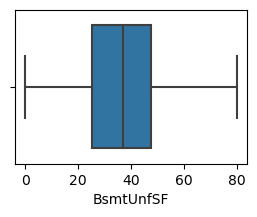

Low Outliers in BsmtUnfSF: []
Upper Outliers in BsmtUnfSF: []




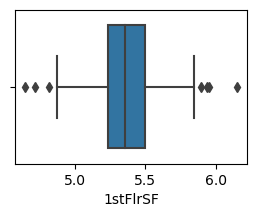

Low Outliers in 1stFlrSF: [4.65086848112736, 4.718110736223122, 4.818974134313234]
Upper Outliers in 1stFlrSF: [5.896711403827437, 5.938652887640418, 5.953494961995196, 6.146688049172391]




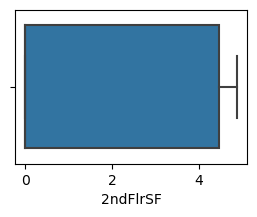

Low Outliers in 2ndFlrSF: []
Upper Outliers in 2ndFlrSF: []




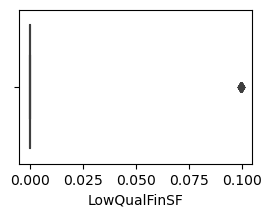

Low Outliers in LowQualFinSF: []
Upper Outliers in LowQualFinSF: [0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178, 0.09981397831392178]




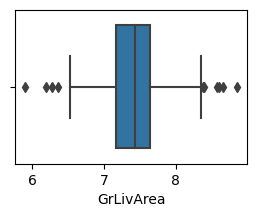

Low Outliers in GrLivArea: [5.90877524278351, 6.18820317603775, 6.282727081497974, 6.365408390261964]
Upper Outliers in GrLivArea: [8.379871707802305, 8.385366344537136, 8.567410211912891, 8.60553371742256, 8.651326383911385, 8.848186099127439]




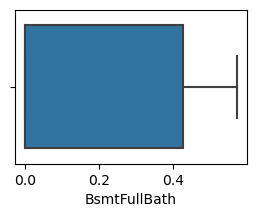

Low Outliers in BsmtFullBath: []
Upper Outliers in BsmtFullBath: []




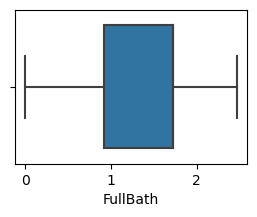

Low Outliers in FullBath: []
Upper Outliers in FullBath: []




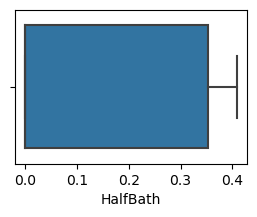

Low Outliers in HalfBath: []
Upper Outliers in HalfBath: []




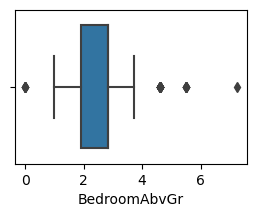

Low Outliers in BedroomAbvGr: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Upper Outliers in BedroomAbvGr: [4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 4.6247635741843975, 5.504819184621347, 5.504819184621347, 5.504819184621347, 5.504819184621347, 5.504819184621347, 5.504819184621347, 5.504819184621347, 7.240351689671794]




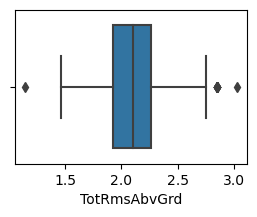

Low Outliers in TotRmsAbvGrd: [1.148369068491514]
Upper Outliers in TotRmsAbvGrd: [2.847263912824086, 2.847263912824086, 2.847263912824086, 2.847263912824086, 2.847263912824086, 2.847263912824086, 2.847263912824086, 2.847263912824086, 2.847263912824086, 2.847263912824086, 2.847263912824086, 3.0239916323762506]




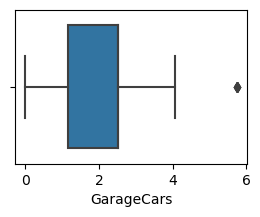

Low Outliers in GarageCars: []
Upper Outliers in GarageCars: [5.737615474389409, 5.737615474389409, 5.737615474389409, 5.737615474389409, 5.737615474389409]




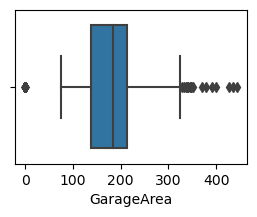

Low Outliers in GarageArea: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Upper Outliers in GarageArea: [329.08538095000364, 332.34960333265354, 337.5028333394237, 339.1263738676507, 340.4779489449445, 345.3333816111313, 347.7551619853195, 347.7551619853195, 348.02400700133194, 352.3190170590449, 369.645201232158, 378.10577299095627, 392.28466160151027, 399.58987302482404, 427.4851643671576, 436.17900327253204, 443.3085348443663]




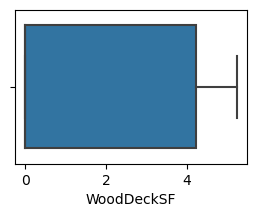

Low Outliers in WoodDeckSF: []
Upper Outliers in WoodDeckSF: []




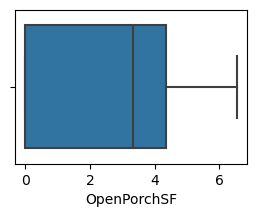

Low Outliers in OpenPorchSF: []
Upper Outliers in OpenPorchSF: []




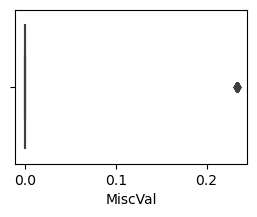

Low Outliers in MiscVal: []
Upper Outliers in MiscVal: [0.23345593012796304, 0.2334559383176999, 0.23345593831896957, 0.23345593831896957, 0.23345593831896957, 0.23345593831896957, 0.23345593831896957, 0.23345593831896957, 0.23345593831896957, 0.23345593831896957, 0.23345593831896957, 0.23345593831896957, 0.23345593831896957, 0.23345593831962252, 0.23345593831962252, 0.23345593831962252, 0.23345593831962252, 0.23345593831986308, 0.23345593831986308, 0.2334559383199844, 0.2334559383199844, 0.2334559383199844, 0.2334559383199844, 0.2334559383199844, 0.2334559383199844, 0.2334559383199844, 0.2334559383199844, 0.23345593832022868, 0.23345593832032877, 0.23345593832032877, 0.23345593832032877, 0.23345593832032877, 0.23345593832036696, 0.23345593832046962, 0.23345593832046962, 0.23345593832046962, 0.23345593832046962, 0.23345593832046962, 0.2334559383205353, 0.2334559383206025, 0.2334559383206055, 0.2334559383206055, 0.23345593832060985, 0.23345593832061273, 0.23345593832061884, 0.2334559383

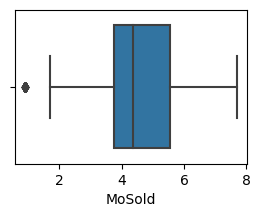

Low Outliers in MoSold: [0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907199, 0.9064889818907

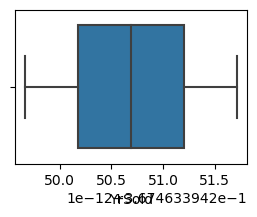

Low Outliers in YrSold: []
Upper Outliers in YrSold: []




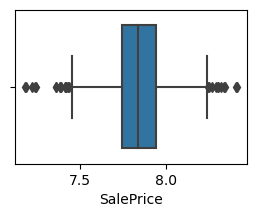

Low Outliers in SalePrice: [7.1854480094109405, 7.190681285144655, 7.222208984844138, 7.2383052849262, 7.24612341970352, 7.3610638092413465, 7.365212453232053, 7.3853368308184715, 7.3853368308184715, 7.393058334092763, 7.411914406398275, 7.422784868469851, 7.422784868469851, 7.422784868469851, 7.429870481983891, 7.439466421598341]
Upper Outliers in SalePrice: [8.24323583294845, 8.25085145750017, 8.263299596781652, 8.2885800748235, 8.29983887720171, 8.300867016946563, 8.317555328116047, 8.33484451350064, 8.342580605785052, 8.40506684552121, 8.409776233769591]




In [35]:
outliers_list_and_boxplot(yeoj, columns)

### Scaling

In [36]:
scaled_data = yeoj.copy()
# scaled_data1 = yeoj1.copy()

scaler = RobustScaler()
# scaler1 = RobustScaler

scaled_data[columns] = scaler.fit_transform(scaled_data[columns])
# scaled_data1[columns] = scaler1.fit_transform(scaled_data1[columns])

In [37]:
train[columns] = scaled_data[columns]
# test[columns] = scaled_data1[columns]

# Running some models

In [38]:
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Comparing different models

In [41]:
def compare_models(X_train, y_train, models):
    best_rmse = np.inf

    for model in models:
        regressor = model
        regressor.fit(X_train, y_train)
        predictions = regressor.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, predictions))
        if rmse < best_rmse:
            best_rmse = round(rmse, 2)
    print(f"Best RMSE is for {model}. RMSE = {best_rmse}")

In [42]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]
compare_models(X_train, y_train, models)

Best RMSE is for RandomForestRegressor(). RMSE = 0.28
